In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:


def simulate_binary_matrix_invertibility(min_size=2, max_size=15, trials=10000):
    """
    Simulates the probability of a random binary matrix being invertible
    for matrices of different sizes.
    
    Args:
        min_size: The minimum matrix size to test
        max_size: The maximum matrix size to test
        trials: Number of random matrices to generate for each size
        
    Returns:
        sizes: List of matrix sizes tested
        probabilities: List of probabilities of being invertible
    """
    sizes = range(min_size, max_size + 1)
    probabilities = []
    
    # Overall progress bar for all matrix sizes
    #with tqdm(total=len(sizes), desc="Overall progress", position=0) as pbar1:
    for size in sizes:
        invertible_count = 0

        # Nested progress bar for trials within each matrix size
        #with tqdm(total=trials, desc=f"{size}x{size} matrix", position=1, leave=False) as pbar2:
        for _ in range(trials):
            # Generate a random binary matrix (0 or 1 entries)
            matrix = np.random.randint(0, 2, size=(size, size))

            # Check if matrix is invertible (determinant != 0)
            try:
                det = np.linalg.det(matrix)
                if abs(det) > 1e-10:  # Using a small threshold to handle floating point errors
                    invertible_count += 1
            except:
                # In case of numerical issues, we can also try to compute the rank
                if np.linalg.matrix_rank(matrix) == size:
                    invertible_count += 1

            #pbar2.update(1)

        probability = invertible_count / trials
        probabilities.append(probability)
        print(f"{size}x{size} matrix: Probability of being invertible = {probability:.4f}")
        #pbar1.update(1)
    
    return list(sizes), probabilities

In [18]:
def plot_results(sizes, probabilities):
    """
    Plots the results of the simulation.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, probabilities, 'o-', linewidth=2)
    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Matrix Size (n×n)')
    plt.ylabel('Probability of being Invertible')
    plt.title('Probability of a Random Binary Matrix being Invertible')
    plt.xticks(sizes)
    plt.ylim(0, 1.05)
    
    # Add theoretical limit for GF(2) if it exists in the literature
    # plt.axhline(y=0.289, color='g', linestyle='--', alpha=0.5, label='Theoretical limit over GF(2)')
    
    plt.tight_layout()
    # plt.savefig('binary_matrix_invertibility.png')
    plt.show()

2x2 matrix: Probability of being invertible = 0.3826
3x3 matrix: Probability of being invertible = 0.3324
4x4 matrix: Probability of being invertible = 0.3500
5x5 matrix: Probability of being invertible = 0.3708
6x6 matrix: Probability of being invertible = 0.4294
7x7 matrix: Probability of being invertible = 0.4874
8x8 matrix: Probability of being invertible = 0.5546
9x9 matrix: Probability of being invertible = 0.6294
10x10 matrix: Probability of being invertible = 0.7068
11x11 matrix: Probability of being invertible = 0.7748
12x12 matrix: Probability of being invertible = 0.8352
13x13 matrix: Probability of being invertible = 0.8858
14x14 matrix: Probability of being invertible = 0.9254
15x15 matrix: Probability of being invertible = 0.9526


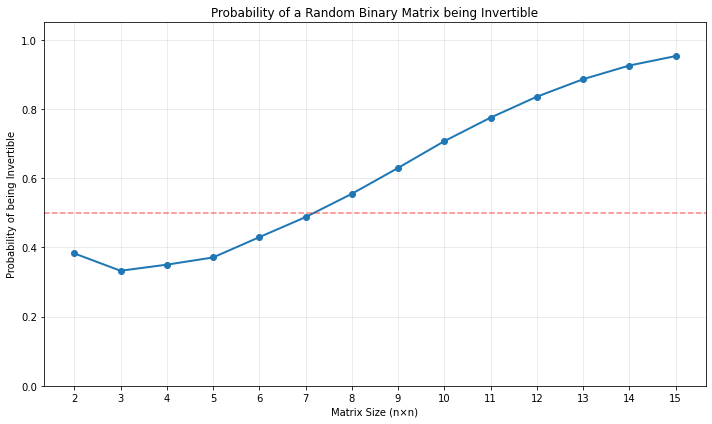


Summary of results:
2x2 matrix: 0.382600
3x3 matrix: 0.332400
4x4 matrix: 0.350000
5x5 matrix: 0.370800
6x6 matrix: 0.429400
7x7 matrix: 0.487400
8x8 matrix: 0.554600
9x9 matrix: 0.629400
10x10 matrix: 0.706800
11x11 matrix: 0.774800
12x12 matrix: 0.835200
13x13 matrix: 0.885800
14x14 matrix: 0.925400
15x15 matrix: 0.952600


In [19]:
if __name__ == "__main__":
    # Run the simulation
    sizes, probabilities = simulate_binary_matrix_invertibility(min_size=2, max_size=15, trials=5000)
    
    # Plot the results
    plot_results(sizes, probabilities)
    
    # Print summary
    print("\nSummary of results:")
    for size, prob in zip(sizes, probabilities):
        print(f"{size}x{size} matrix: {prob:.6f}")